In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [3]:
pd.get_option('display.max_rows')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.shape

(768, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# observation

1. Outcome is the target variable
2. There are 8 independent variables in the dataset
3. There is 0 null values present in the dataset
4. There are 8 continuous variables 


In [9]:
[feature for feature in data.columns if data[feature].nunique()<15]

['Outcome']

# observation

Outcome is the only categorical variable present in the dataset

In [10]:
data.sort_values('BloodPressure', ascending=False)[['Age', 'BloodPressure']].head(5)

,Age,BloodPressure
106,27,122
691,44,114
43,54,110
549,37,110
177,26,110


# observation 

27 years old has a high blood pressure of 122

In [11]:
data.groupby(by='Age')['Pregnancies'].agg('count').sort_values(ascending=False).head(2)

Age
22    72
21    63
Name: Pregnancies, dtype: int64

# observation

woman with age 22 has most number of pregnancies followed by age 21.

In [12]:
data.groupby('Pregnancies')['BloodPressure'].agg('mean')

Pregnancies
0     67.153153
1     67.792593
2     63.252427
3     66.586667
4     70.029412
5     76.210526
6     68.420000
7     70.777778
8     75.184211
9     77.892857
10    70.208333
11    74.181818
12    76.333333
13    73.800000
14    70.000000
15    70.000000
17    72.000000
Name: BloodPressure, dtype: float64

# observation

The average blood pressure of the woman increases with number of pregnancies

In [13]:
data.groupby('Age')['BloodPressure'].agg('mean').sort_values(ascending=False).head(5)

Age
54    89.333333
66    86.000000
51    84.500000
45    83.066667
70    82.000000
Name: BloodPressure, dtype: float64

# observation

The average bloodpressure of age 54 is very high around 90 compared to other aged people.

In [14]:
data.sort_values(by='BMI', ascending=False)[['BMI', 'Age']].head(5)

,BMI,Age
177,67.1,26
445,59.4,25
673,57.3,22
125,55.0,26
120,53.2,25


# observation

The person with age 26 has abnormally high BMI of 67.1.

In [15]:
data.sort_values('Pregnancies', ascending=False)[['Pregnancies', 'Age']].head(5)

,Pregnancies,Age
159,17,47
88,15,43
298,14,46
455,14,38
274,13,52


# observation

Age 47 has highest pregnancies of 47(this may be wrong due to improper imputation).

In [16]:
data.sort_values(by='SkinThickness')[['SkinThickness', 'BloodPressure', 'Age']].head(5)

,SkinThickness,BloodPressure,Age
686,0,64,22
201,0,82,28
683,0,80,27
578,0,68,36
207,0,104,52


# observation

Wrong imputation, there is no person with 0 skin thickness at age 22.

<AxesSubplot:ylabel='None'>

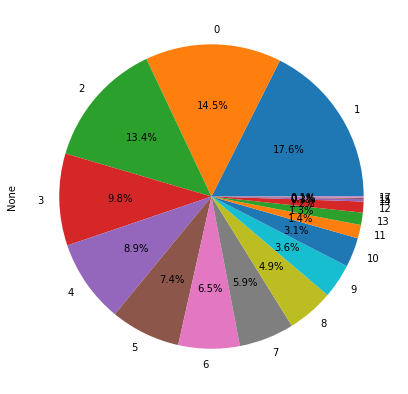

In [17]:
plt.figure(figsize=(7,7))
data.value_counts('Pregnancies').plot(kind='pie', autopct = '%1.1f%%')

# observation

women with one time pregnancy are more with 17.6%. 

In [18]:
data.Age.nunique()

52

In [19]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
data.Pregnancies.nunique()

17

In [21]:
data.Glucose.nunique()

136

In [22]:
data.BloodPressure.nunique()

47

In [23]:
data.Insulin.nunique()

186

In [24]:
data.BMI.nunique()

248

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


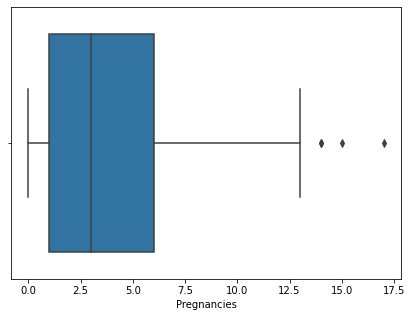

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


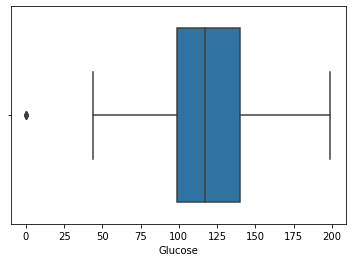

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


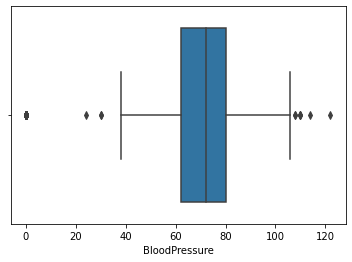

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


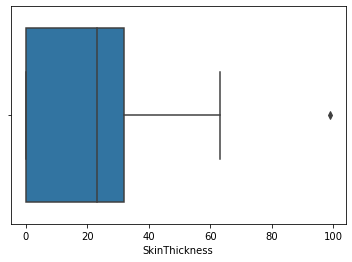

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


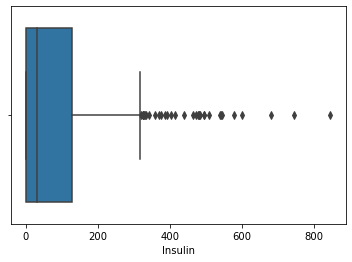

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


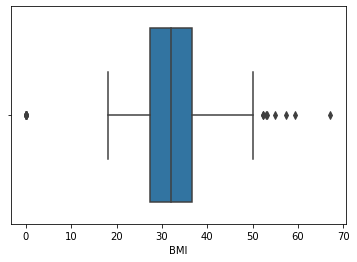

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


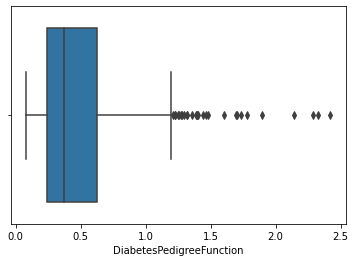

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


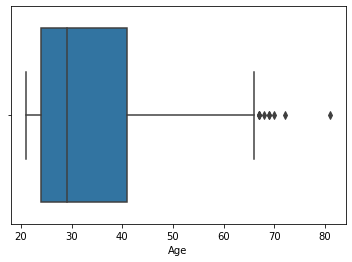

In [25]:
plt.figure(figsize=(7,5))
for feature in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(data[feature])
    plt.show()

# observation 

1. pregnancies has outliers present in the upper side
2. Glucose has outliers in the lower side
3. BloodPressure has outliers present in both the sides 
4. There is only one outlier present in the outer boundary of the skinthickness feature
5. Insulin has lots of outliers present in the upper region
6. DiabetesPedigreeFunction and Age have outliers in the upper boundary

In [26]:
data[data.columns[0]]

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

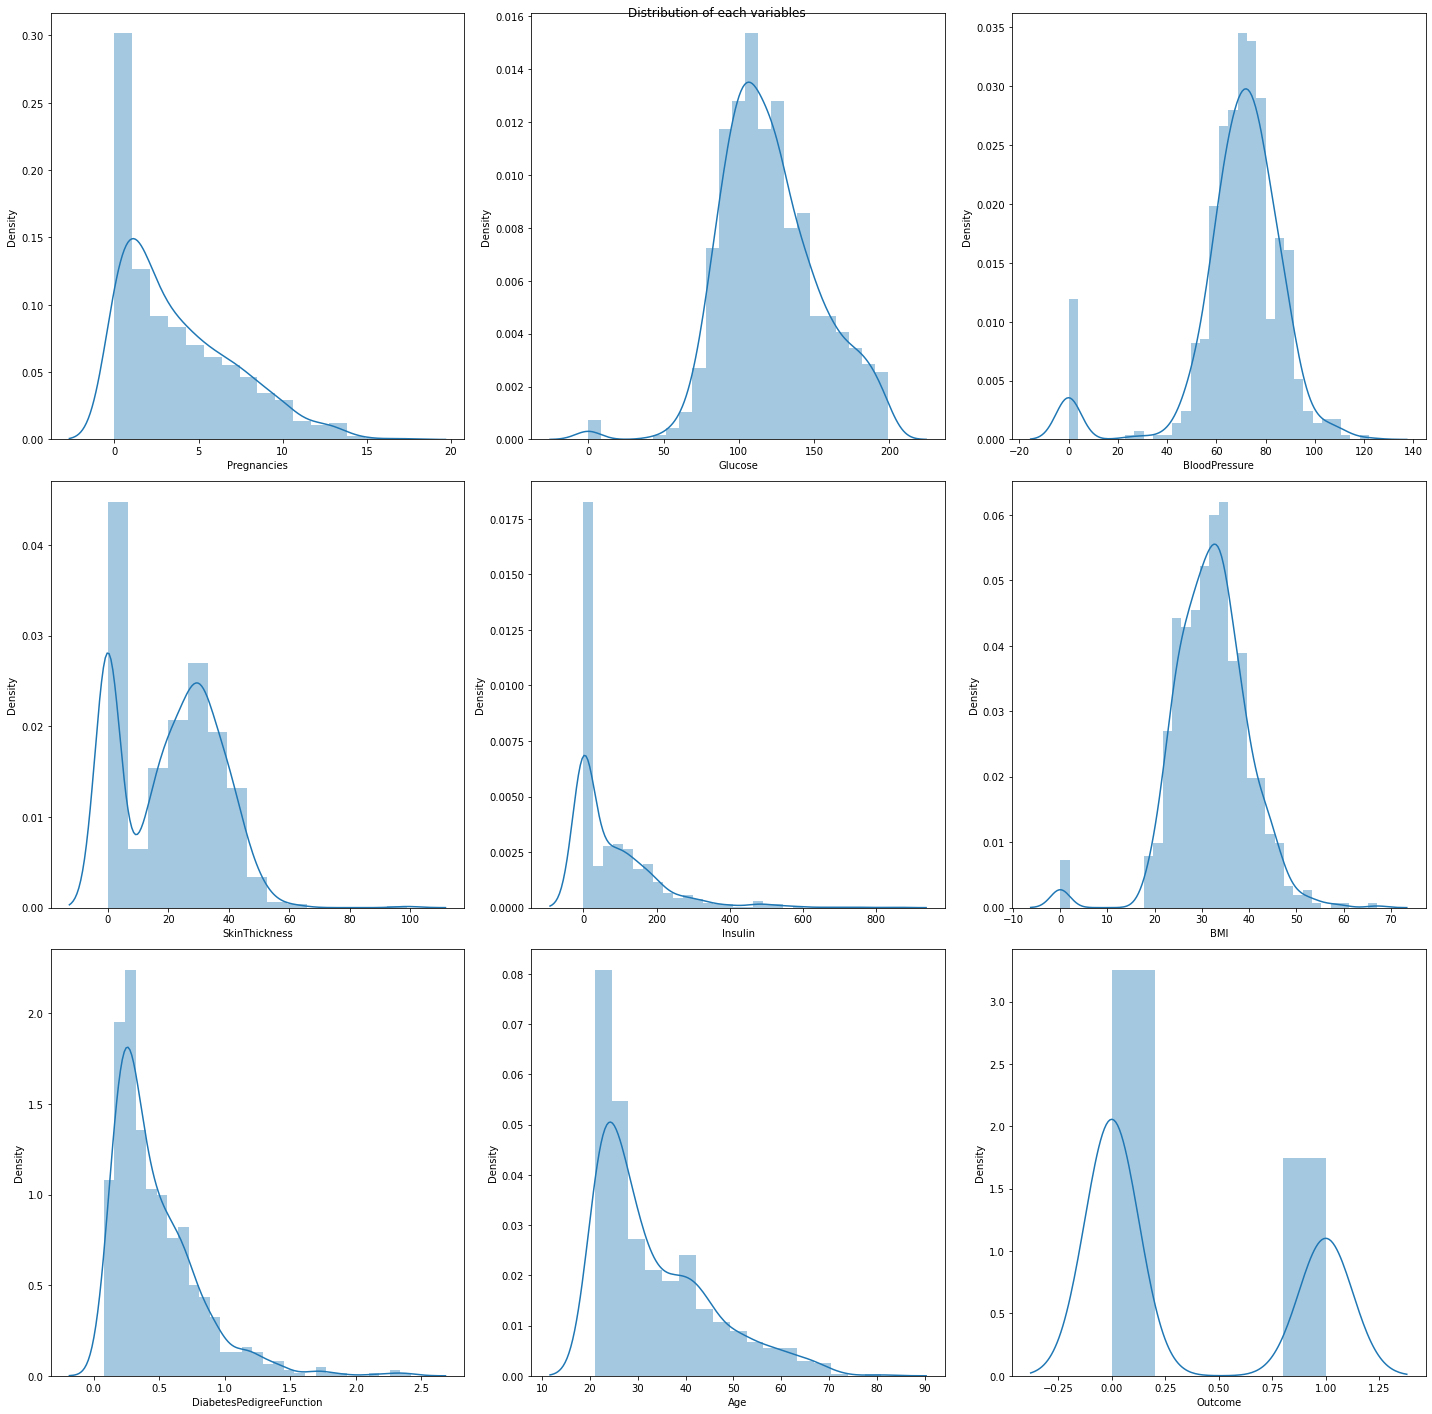

In [27]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribution of each variables')

for i in range(len(data.columns)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[data.columns[i]])
    plt.tight_layout()

# observation

1. Pregnencies, Insulin, DiabetesPedigreefunction and Age are rightly skewed
2. Glucose, BMI, BloodPressure, Skinthickness are approximately normally distributed

# Note

Features Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age having
lots of null values. so fixing those null values with their mean values. 

In [28]:
for feature in ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose']:
    mean = data[feature].mean()
    data[feature] = data[feature].replace(0, mean)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

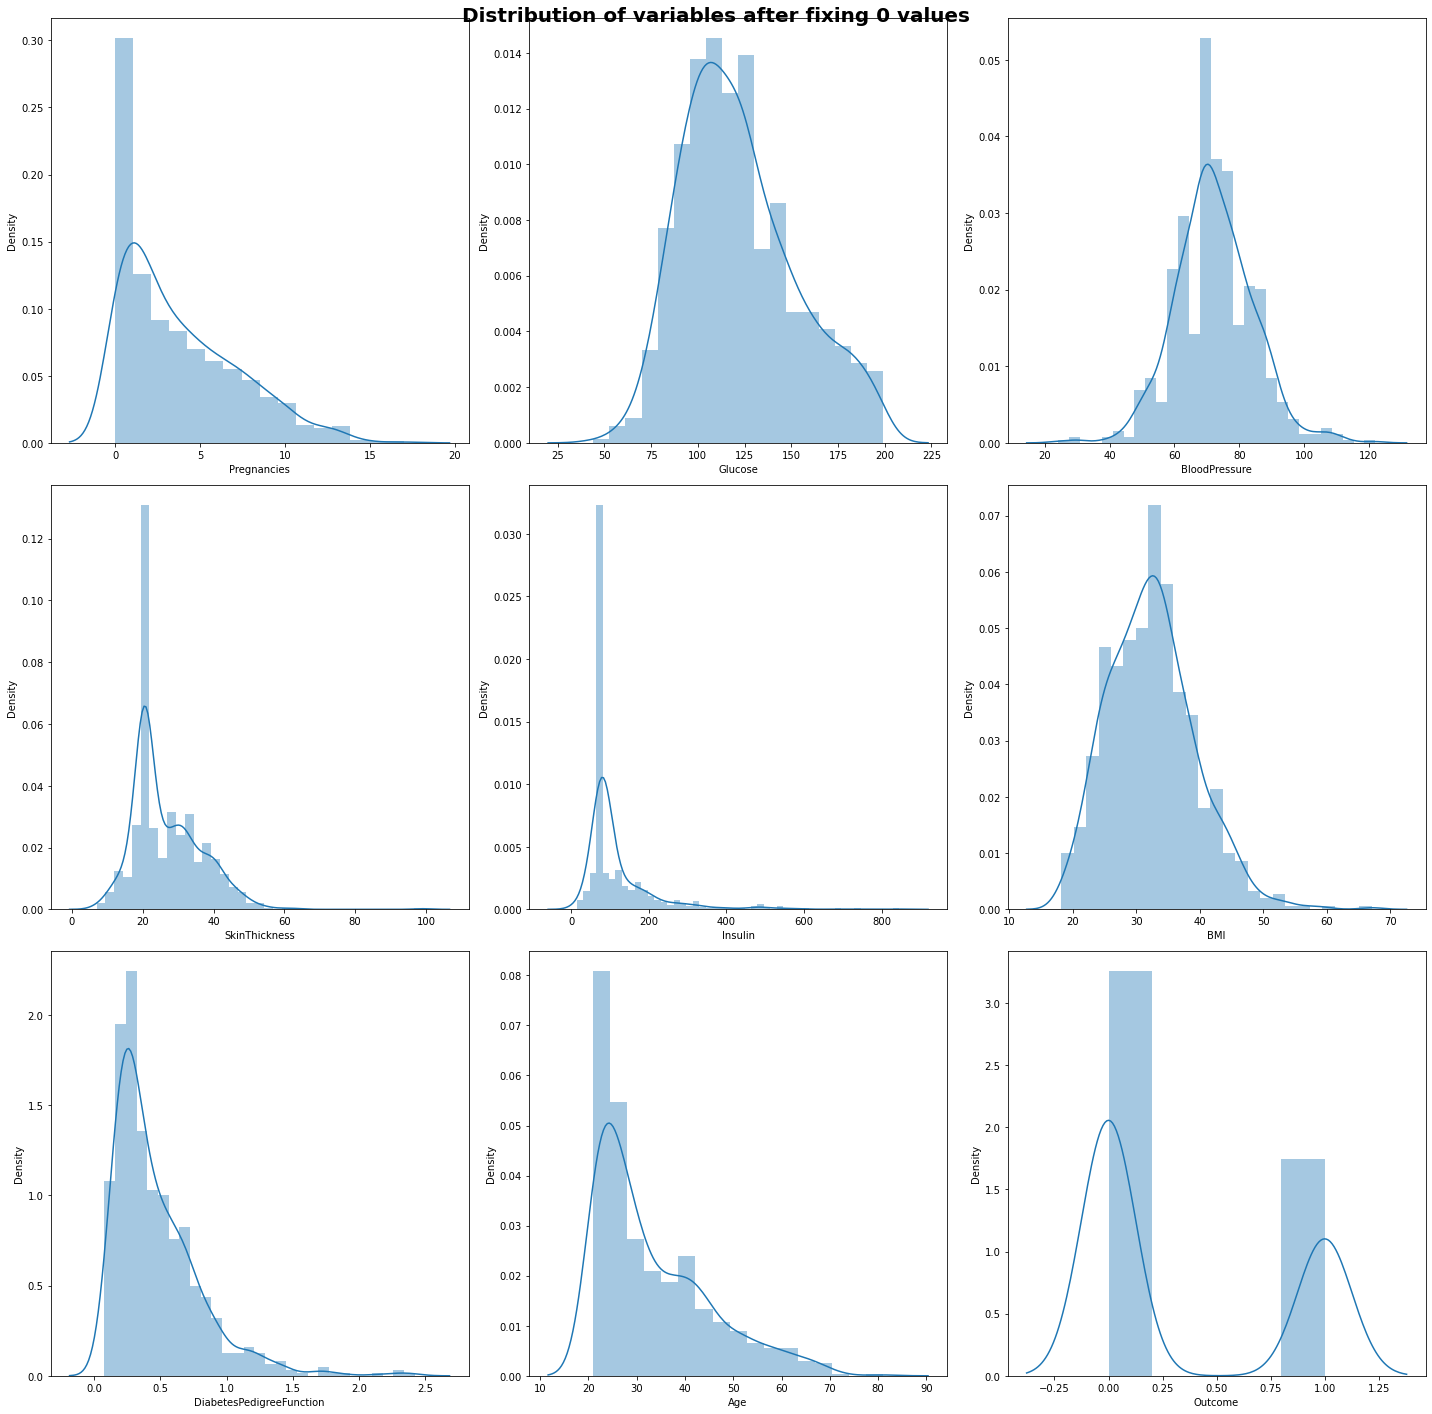

In [29]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribution of variables after fixing 0 values', fontsize=20, fontweight='bold')

for i in range(len(data.columns)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[data.columns[i]])
    plt.tight_layout()

# observation

After fixing the 0 values, the transformation of data looks good but still there are lot more
outliers present in it.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


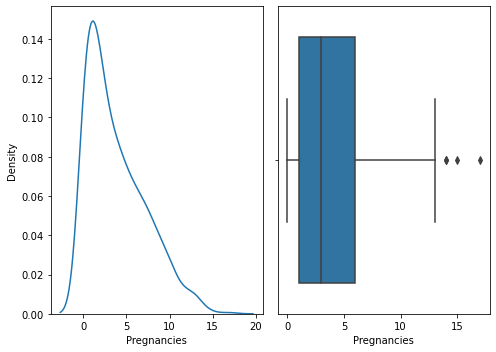

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


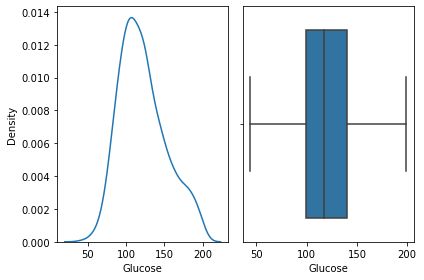

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


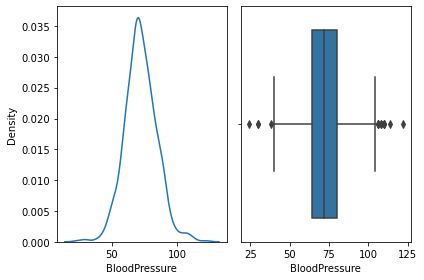

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


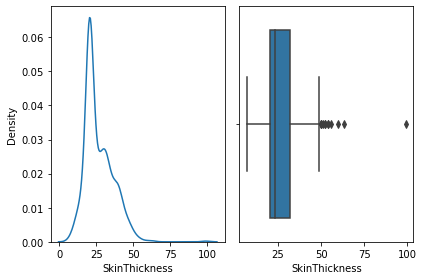

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


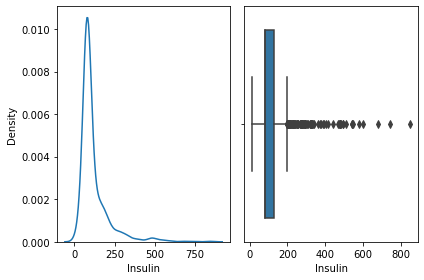

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


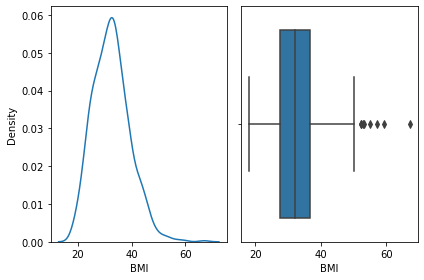

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


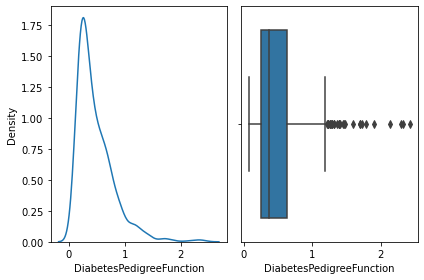

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


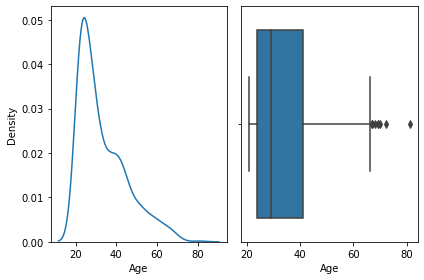

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


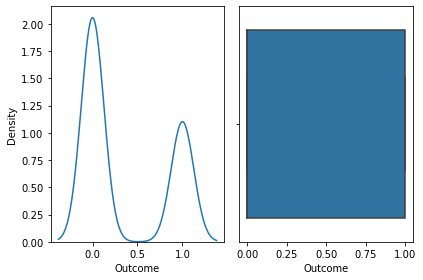

In [30]:
plt.figure(figsize=(7,5))
for feature in data.columns:
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    
    plt.subplot(1,2,2)
    sns.boxplot(data[feature])
    plt.tight_layout()
    plt.show()

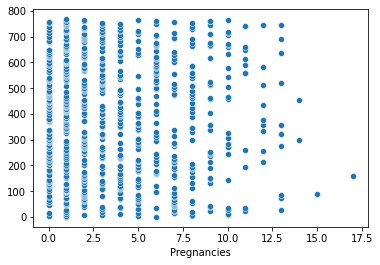

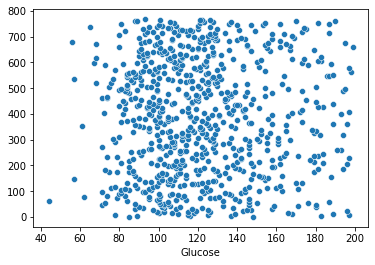

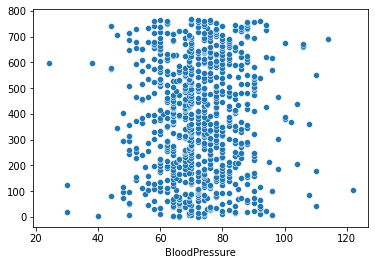

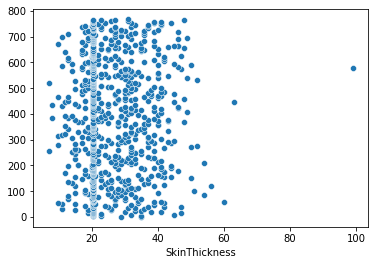

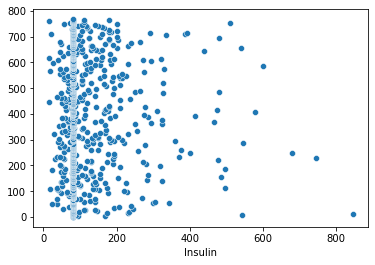

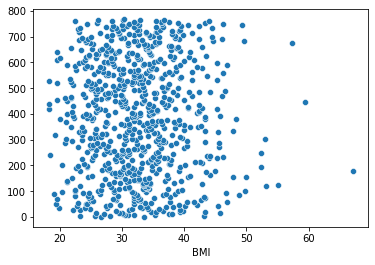

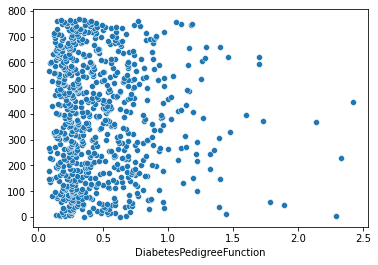

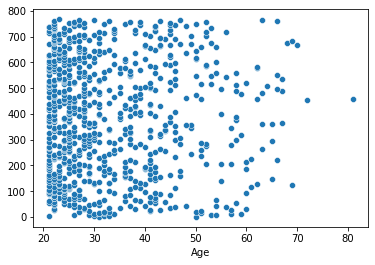

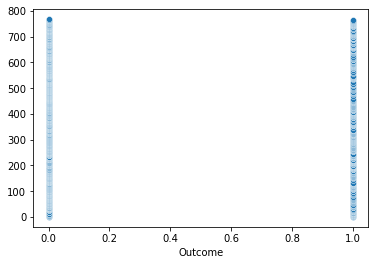

In [31]:
for i in range(len(data.columns)):
    sns.scatterplot(x=data.columns[i], y=data.index, data=data)
    plt.show()

# observation

there is no such trend in the features

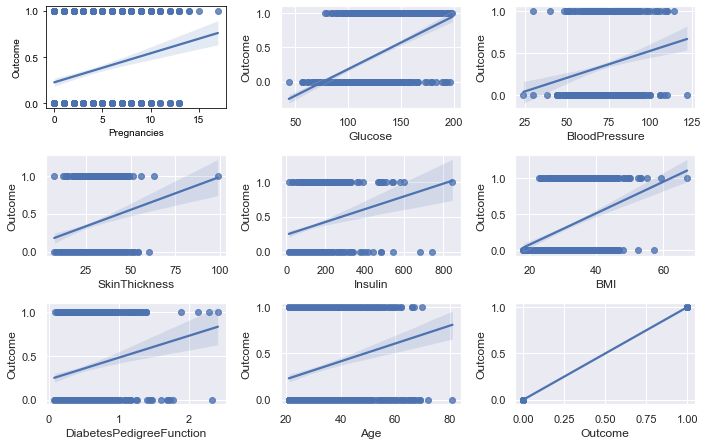

In [32]:
plt.figure(figsize=(10,10))
for i in range(len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.set_theme()
    sns.regplot(x=data.columns[i], y=data.Outcome, data=data, color='b')
    plt.tight_layout()

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

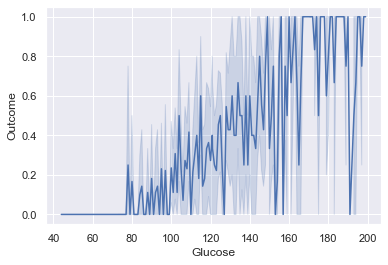

In [33]:
sns.lineplot(x=data.Glucose, y=data.Outcome)

observation: there is a positive corelation between glucose and outcome

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

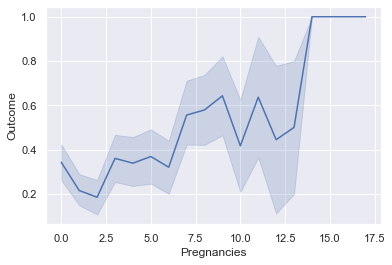

In [34]:
sns.lineplot(x= data.Pregnancies, y=data.Outcome)

observation: positive corelation exists between pregnencies and outcome

<AxesSubplot:xlabel='BloodPressure', ylabel='Outcome'>

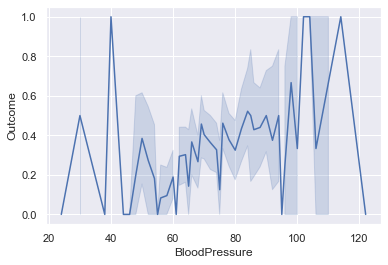

In [35]:
sns.lineplot(x = data.BloodPressure, y =data.Outcome)

observation: positive corelation

<AxesSubplot:xlabel='SkinThickness', ylabel='Outcome'>

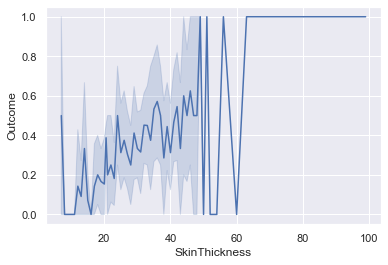

In [36]:
sns.lineplot(x = data.SkinThickness, y =data.Outcome)

observation: positive corelation

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

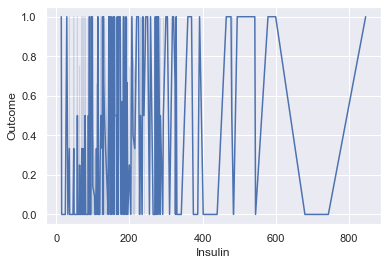

In [37]:
sns.lineplot(x = data.Insulin, y =data.Outcome)

observation: zero corelation exists between insulin and outcome

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

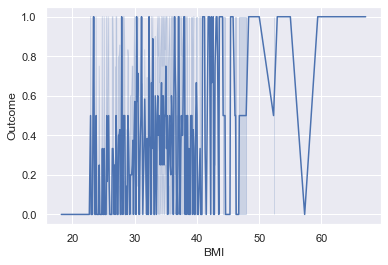

In [38]:
sns.lineplot(x = data.BMI, y =data.Outcome)

observation: no corelation as well between bmi and outcome

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

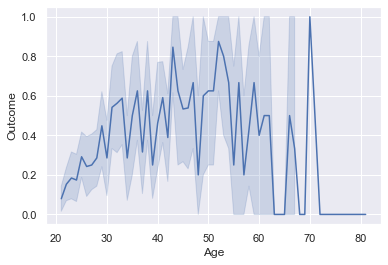

In [39]:
sns.lineplot(x = data.Age, y =data.Outcome)

observation: positive corelation

In [40]:
from scipy.stats import probplot

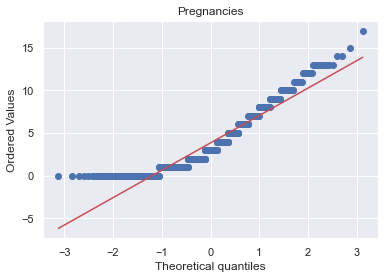

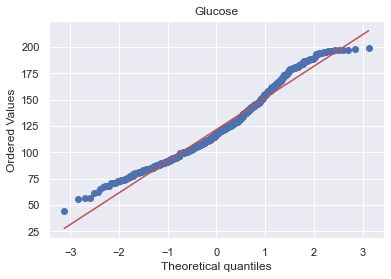

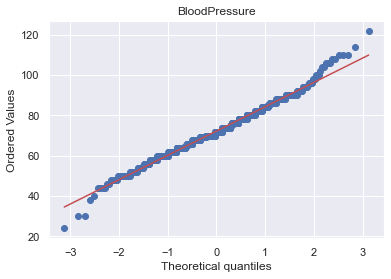

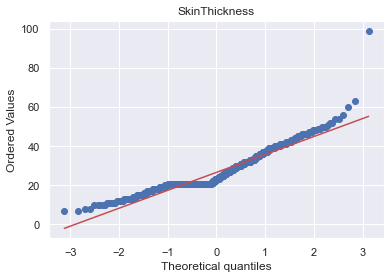

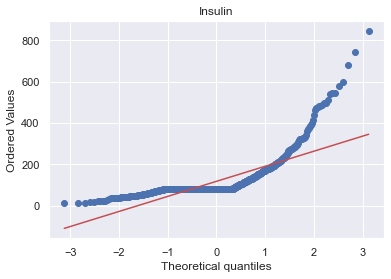

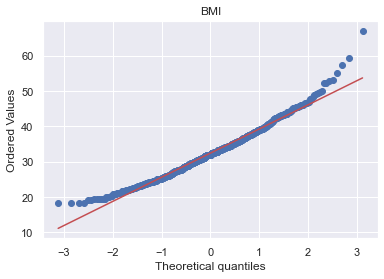

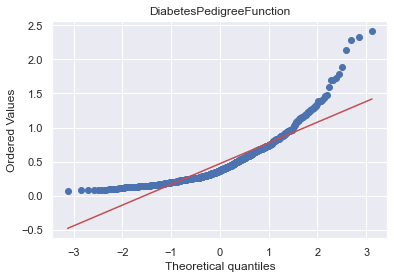

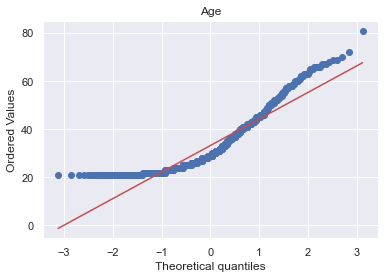

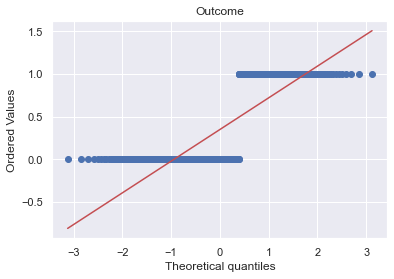

In [41]:
for feature in data.columns:
    probplot(data[feature], plot=plt, fit=True)
    plt.title('{}'.format(feature))
    plt.show()

observation

Q-Q plot can be used to identify the normal distribution of the features
1. Glucose, BloodPressure, SkinThickness, BMI are normally distributed
2. Pregnencies, Insulin, DiabetespedigreeFunction and age are not normally distributed

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

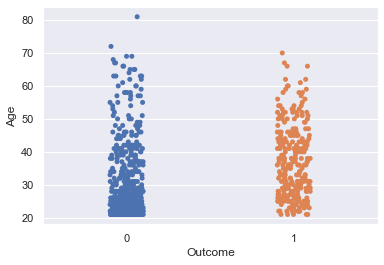

In [42]:
sns.stripplot(y=data.Age, x=data.Outcome)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

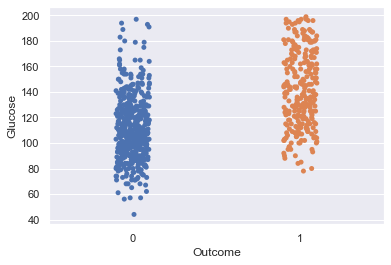

In [43]:
sns.stripplot(x= data.Outcome, y= data.Glucose)

observation : strip plot can be used to compare the relation between numerical and categorical
    variables

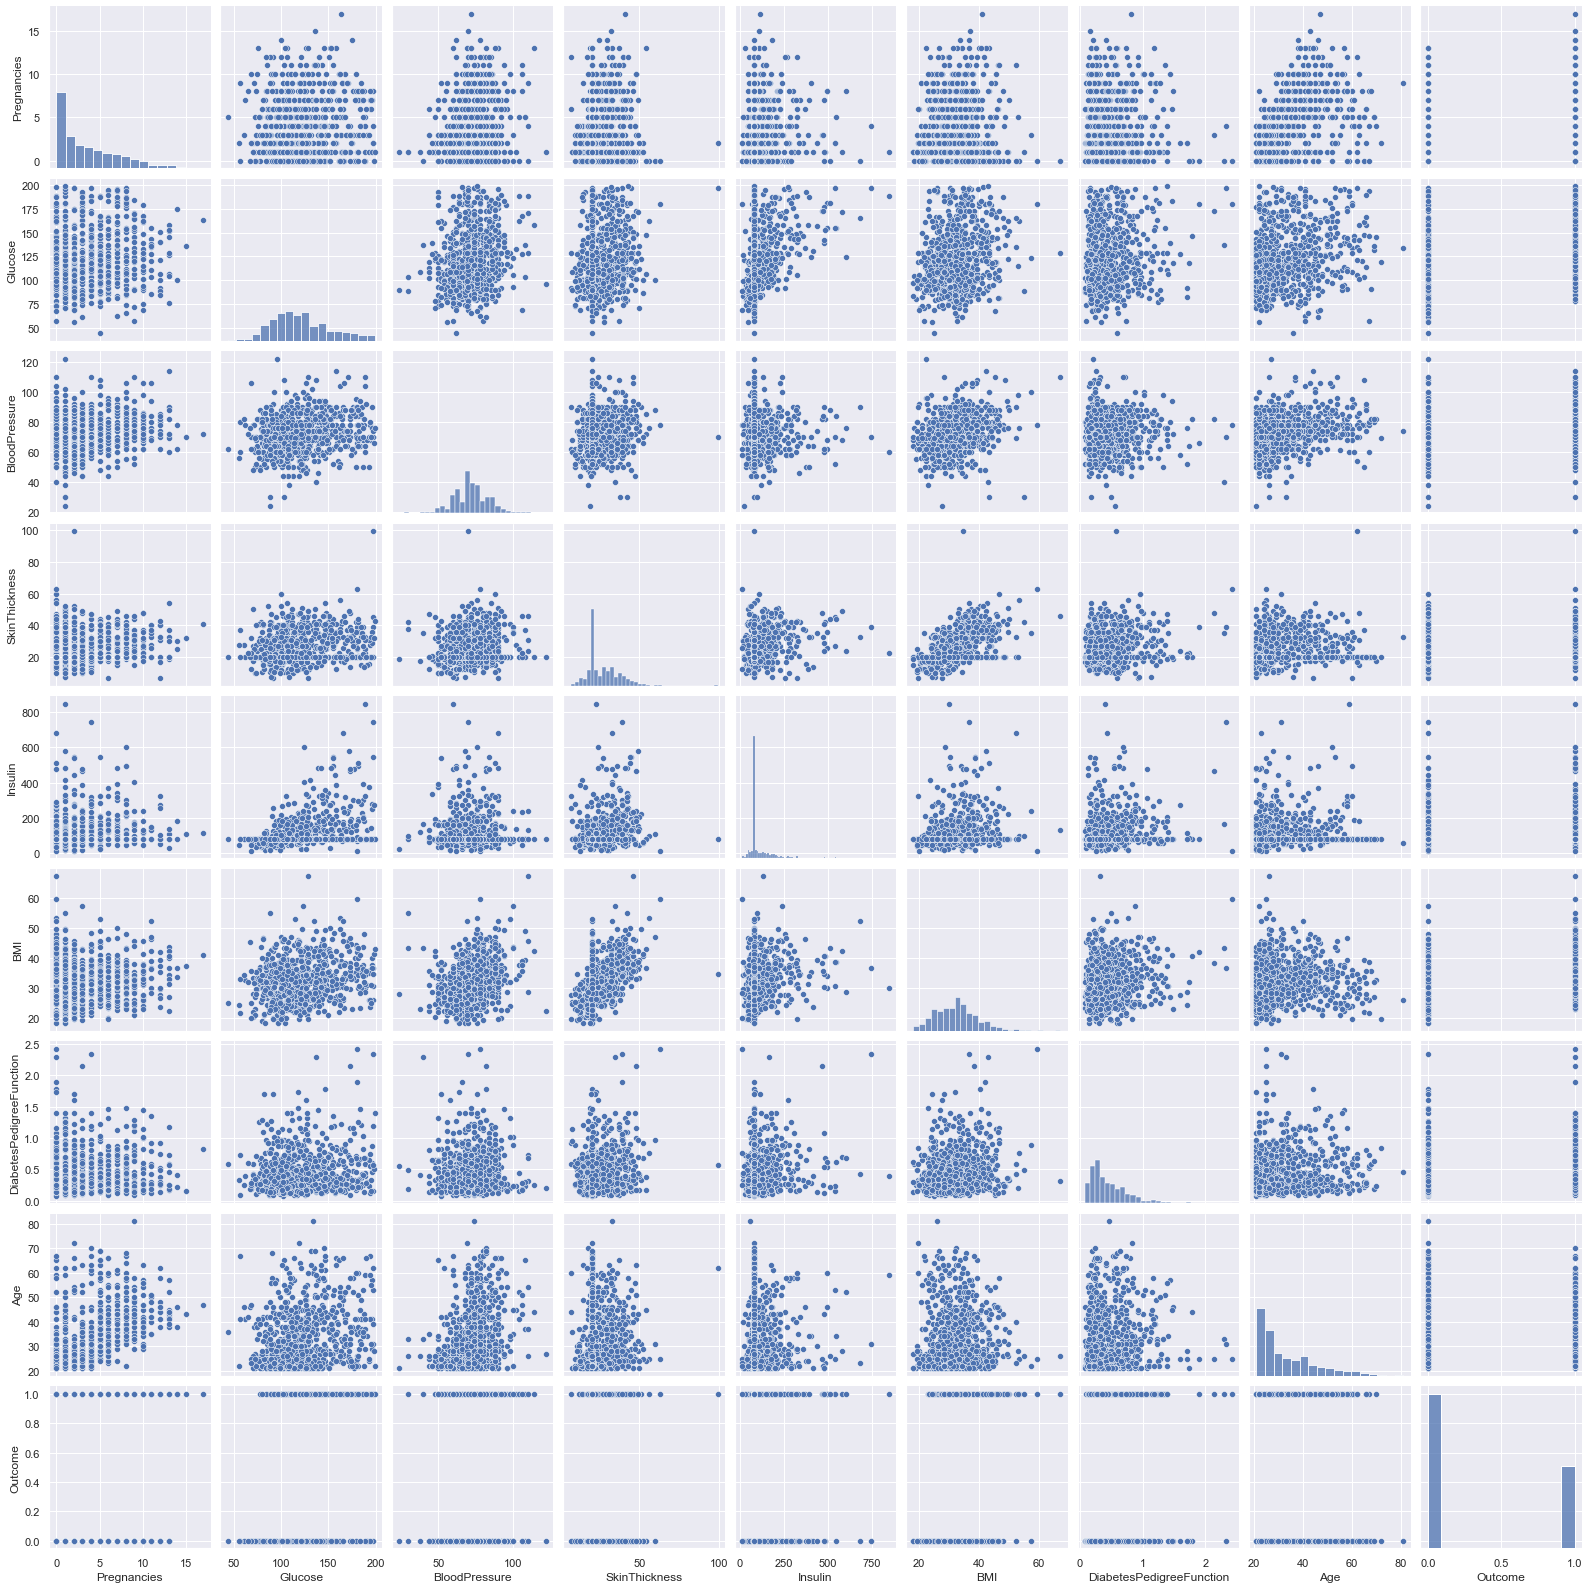

In [44]:
sns.pairplot(data)

observation: pairplot can be used to find the corelation between the variables

In [45]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<AxesSubplot:>

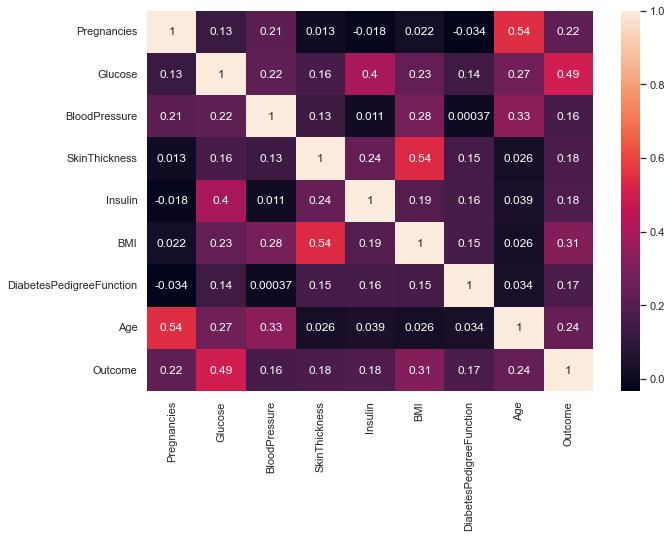

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

observation:

1. age and pregnencies, BMI and SkinThickness are positively corelated.

There are not much corelation between the variables so there will not be any chances of
multi colinearity.

<AxesSubplot:>

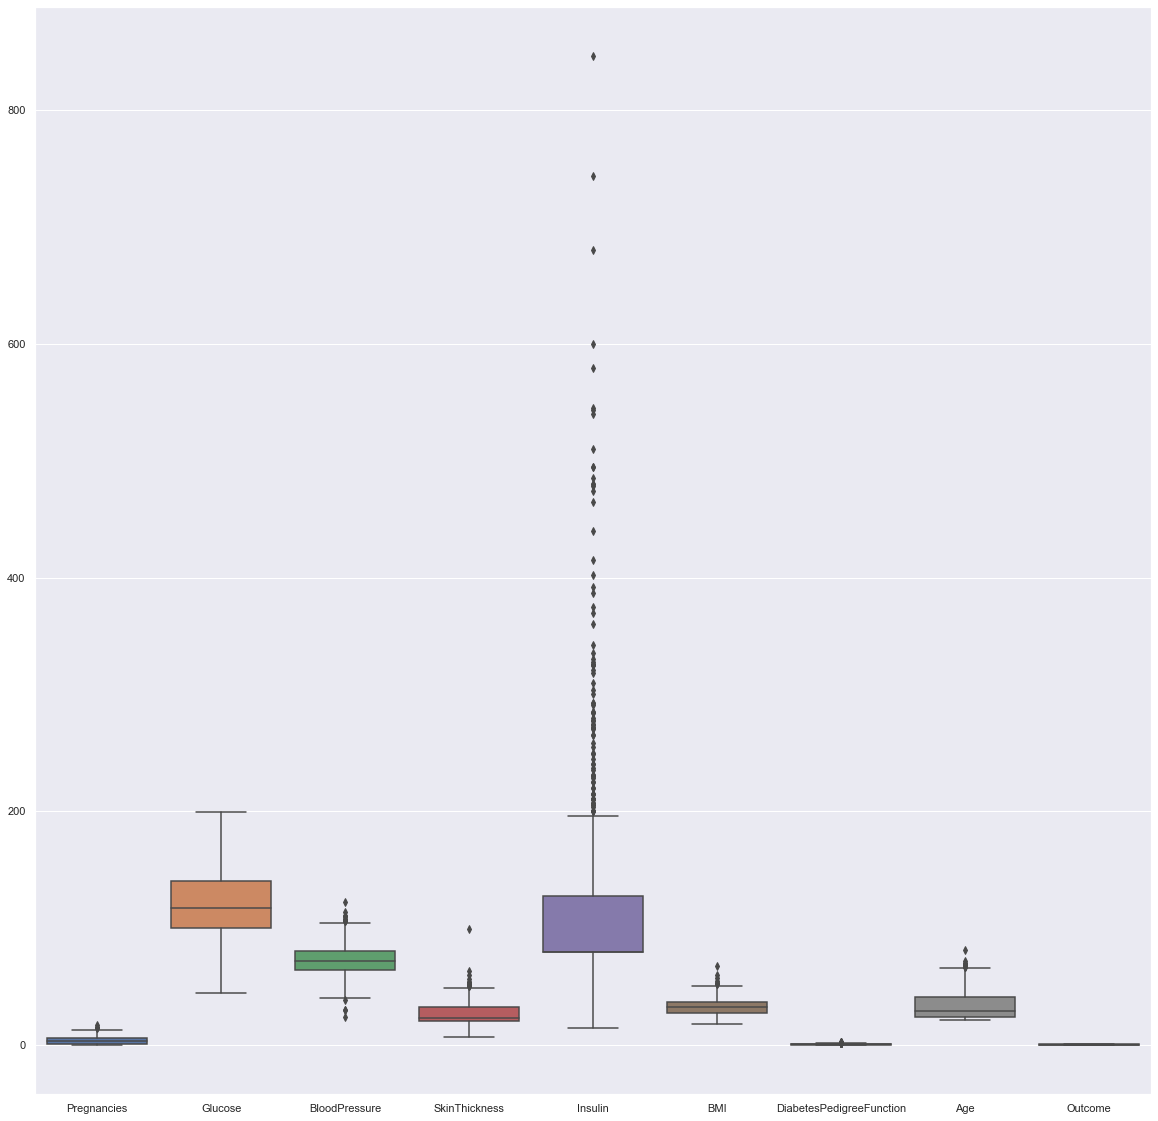

In [47]:
plt.figure(figsize=(20,20))
sns.boxplot(data= data)

In [48]:
for feature in data.columns:
    upper_quantile = data[feature].quantile(0.75)
    lower_quantile = data[feature].quantile(0.25)
    inter_quantile = upper_quantile-lower_quantile
    upper_boundary = upper_quantile + (3*inter_quantile)
    lower_boundary = lower_quantile - (3*inter_quantile)
    data.loc[data[feature]>upper_boundary, feature] = np.nan
    data.loc[data[feature]<lower_boundary, feature] = np.nan

In [49]:
data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                1
Insulin                     52
BMI                          1
DiabetesPedigreeFunction     6
Age                          0
Outcome                      0
dtype: int64

observation

converted all the extreme outliers with nan values, now removing all the null values.

In [50]:
data.dropna(inplace=True)

In [51]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
data.reset_index(drop=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
705,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
706,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27.0,0.0
707,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
708,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47.0,1.0


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
x = data.drop('Outcome', axis=1)

In [56]:
y = data.Outcome

In [57]:
x = pd.DataFrame(scaler.fit_transform(x), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [58]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.628162,1.007857,-0.020781,0.994559,-0.419797,0.222035,0.579558,1.441284
1,-0.850602,-1.166049,-0.518987,0.327948,-0.419797,-0.826752,-0.354246,-0.187238
2,1.219668,2.215583,-0.685055,-0.612368,-0.419797,-1.321180,0.731808,-0.101526
3,-0.850602,-1.028024,-0.518987,-0.338664,-0.099755,-0.602012,-0.976782,-1.044354
4,0.332410,-0.096349,0.145288,-0.612368,-0.419797,-0.976578,-0.861748,-0.272949
...,...,...,...,...,...,...,...,...
705,1.811174,-0.613946,0.311356,2.438884,1.838457,0.117156,-0.963248,2.555535
706,-0.554849,0.110689,-0.186850,0.105744,-0.419797,0.701480,-0.391463,-0.530084
707,0.332410,0.076183,-0.020781,-0.338664,0.305917,-0.886682,-0.712881,-0.272949
708,-0.850602,0.248715,-1.017192,-0.612368,-0.419797,-0.302358,-0.361013,1.184149


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x,i) for i in
range(x.shape[1])]
vif["Features"] = x.columns

In [61]:
vif

,vif,Features
0,1.425480,Pregnancies
1,1.259586,Glucose
2,1.254570,BloodPressure
3,1.461929,SkinThickness
4,1.232746,Insulin
5,1.512753,BMI
6,1.049210,DiabetesPedigreeFunction
7,1.604070,Age


# observation
if the vif value is over 5 then there is mulicolinearity between the features

here, the vif values are within '5' so there is no multi colinearity between the variables

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logi = LogisticRegression()

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

In [67]:
logi.fit(x_train, y_train)

LogisticRegression()

In [68]:
logi.coef_

array([[ 0.27193503,  1.12291926, -0.04199155, -0.07744073,  0.06814565,
         0.74979838,  0.38534776,  0.22458003]])

In [69]:
logi.intercept_

array([-0.92818956])

In [70]:
y_pred = logi.predict(x_test)

In [71]:
accuracy_score(y_test, y_pred)

0.7676056338028169

In [72]:
confuse = confusion_matrix(y_test, y_pred)
confuse

array([[83, 16],
       [17, 26]], dtype=int64)

In [73]:
true_postive = confuse[0][0]
false_positive = confuse[0][1]
false_negative = confuse[1][0]
true_negative = confuse[1][1]

In [74]:
print (true_postive, false_positive)

83 16


In [75]:
print (true_negative, false_negative)

26 17


In [76]:
confuse

array([[83, 16],
       [17, 26]], dtype=int64)

In [77]:
from sklearn.metrics import classification_report

In [78]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.83      0.84      0.83        99\n         1.0       0.62      0.60      0.61        43\n\n    accuracy                           0.77       142\n   macro avg       0.72      0.72      0.72       142\nweighted avg       0.77      0.77      0.77       142\n'

In [79]:
from sklearn.metrics import plot_confusion_matrix

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x360 with 0 Axes>

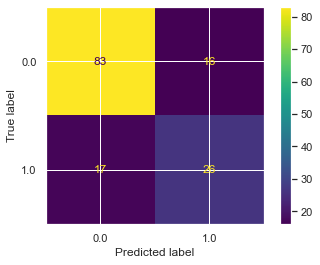

In [80]:
plt.figure(figsize=(7,5))
plot_confusion_matrix(logi, x_test, y_test)

# observation

as per the confusion matrix
1. True Positive 83
2. False Positive 16
3. False Negative 17
4. True Negative 26

In [81]:
from sklearn.metrics import roc_auc_score

Note: AUC score can be used to choose the best model out of all the classification models.

In [82]:
roc_auc_score(y_test, y_pred)

0.721517500587268

AUC score of this model is 72%

# ROC

ROC curve is the graphical representation with respect to True Positive Rate and False
Positive Rate. If the curve is closure to the top left corner then model performance is better
and the closure to the 45 degree line, model is less accurate.


In [83]:
from sklearn.metrics import roc_curve

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [85]:
fpr

array([0.        , 0.16161616, 1.        ])

In [86]:
tpr

array([0.        , 0.60465116, 1.        ])

In [87]:
thresholds

array([2., 1., 0.])

Text(0, 0.5, 'True Positive Rate')

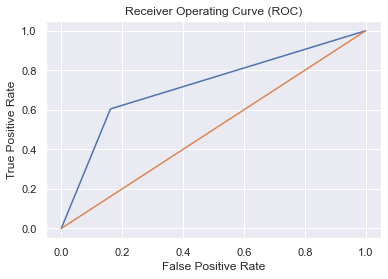

In [88]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.title('Receiver Operating Curve (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# observation

ROC curve is leading towards top left corner means the model is good